# CNN keywords from first sample (useful to get insights on new words to search)

In [ ]:
import os
import requests 
import time
import string
import networkx as nx
import itertools
import networkx as nx
import pandas as pd
import json
import re
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive/NS_project_data')    # write me your email in the group and I'll share with you this folder

In [ ]:
CNN_df = pd.read_csv('/content/drive/MyDrive/NS_project_data/data/CNN_all_tweets_df.csv')

In [ ]:
CNN_df

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,extended_tweet,quote_count,reply_count,retweet_count,favorite_count,entities,favorited,retweeted,possibly_sensitive,filter_level,lang,matching_rules,display_text_range,retweeted_status
0,Mon Nov 29 02:01:06 +0000 2021,1465138721343381508,1465138721343381508,Philadelphia 76ers star Joel Embiid said he ha...,"<a href=""http://www.socialflow.com"" rel=""nofol...",True,NaN,NaN,NaN,NaN,NaN,"{'id': 759251, 'id_str': '759251', 'name': 'CN...",NaN,NaN,NaN,NaN,False,{'full_text': 'Philadelphia 76ers star Joel Em...,17,73,74,274,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,False,low,en,[{'tag': None}],NaN,NaN
1,Mon Nov 29 01:01:06 +0000 2021,1465123620456386573,1465123620456386573,The United States will know in about two weeks...,"<a href=""http://www.socialflow.com"" rel=""nofol...",True,NaN,NaN,NaN,NaN,NaN,"{'id': 759251, 'id_str': '759251', 'name': 'CN...",NaN,NaN,NaN,NaN,False,{'full_text': 'The United States will know in ...,22,281,182,625,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,False,low,en,[{'tag': None}],NaN,NaN
2,Sun Nov 28 19:04:04 +0000 2021,1465033768859803656,1465033768859803656,Israel is banning all foreigners from entering...,"<a href=""http://www.socialflow.com"" rel=""nofol...",True,NaN,NaN,NaN,NaN,NaN,"{'id': 759251, 'id_str': '759251', 'name': 'CN...",NaN,NaN,NaN,NaN,False,{'full_text': 'Israel is banning all foreigner...,18,78,93,311,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,False,low,en,[{'tag': None}],NaN,NaN
3,Sun Nov 28 18:00:05 +0000 2021,1465017670223417351,1465017670223417351,The world is in a “race against time” with the...,"<a href=""http://www.socialflow.com"" rel=""nofol...",True,NaN,NaN,NaN,NaN,NaN,"{'id': 759251, 'id_str': '759251', 'name': 'CN...",NaN,NaN,NaN,NaN,False,{'full_text': 'The world is in a “race against...,43,338,157,467,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,False,low,en,[{'tag': None}],NaN,NaN
4,Sun Nov 28 16:30:04 +0000 2021,1464995013964746754,1464995013964746754,NHL postpones upcoming New York Islanders game...,"<a href=""http://www.socialflow.com"" rel=""nofol...",False,NaN,NaN,NaN,NaN,NaN,"{'id': 759251, 'id_str': '759251', 'name': 'CN...",NaN,NaN,NaN,NaN,False,NaN,9,54,42,157,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,False,low,en,[{'tag': None}],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Sat Oct 30 06:13:05 +0000 2021,1454330499908911108,1454330499908911108,Iowa Republican Gov. Kim Reynolds has signed a...,"<a href=""http://www.socialflow.com"" rel=""nofol...",True,NaN,NaN,NaN,NaN,NaN,"{'id': 759251, 'id_str': '759251', 'name': 'CN...",NaN,NaN,NaN,NaN,False,{'full_text': 'Iowa Republican Gov. Kim Reynol...,413,1679,656,4117,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,False,low,en,[{'tag': None}],NaN,NaN
226,Sat Oct 30 05:45:04 +0000 2021,1454323448755392513,1454323448755392513,Texas has filed a lawsuit against the Biden ad...,"<a href=""http://www.socialflow.com"" rel=""nofol...",True,NaN,NaN,NaN,NaN,NaN,"{'id': 759251, 'id_str': '759251', 'name': 'CN...",NaN,NaN,NaN,NaN,False,{'full_text': 'Texas has filed a lawsuit again...,25,249,113,737,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,False,low,en,[{'tag': None}],NaN,NaN
227,Sat Oct 30 05:01:04 +0000 2021,1454312376245833728,1454312376245833728,During the recent Covid-19 surge leading into ...,"<a href=""http://www.socialflow.com"" rel=""nofol...",True,NaN,NaN,NaN,NaN,NaN,"{'id': 759251, 'id_str': '759251', 'name': 'CN...",NaN,NaN,NaN,NaN,False,{'full_text': 'During the recent Covid-19 surg...,4,23,32,122,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,False,low,

In [ ]:
def extract_text(df):     # extract the text from the tweets

  list_strings = []

  for index in range(len(df)):

    string = (df.loc[index]['extended_tweet'])

    if type(string) == str :

      s = re.search(':(.+?)https',string).group(1)

      list_strings.append(s)

    else:

      list_strings.append(df.loc[index]['text'])


  return list_strings

In [ ]:
def cleaner(tweet,word_list = stopwords.words('english')):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) # remove mentions
    tweet = re.sub("#[A-Za-z0-9]+", "",tweet) # remove hashtags
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) # remove http links
    tweet = " ".join(tweet.split())
    tweet = str.lower(tweet) #to lowercase
    table = str.maketrans(dict.fromkeys(string.punctuation)) 
    tweet = tweet.translate(table)# remove punctuation

    special_characters = ['rt','dr','“','rt','the','to','of','a','an','on','has','have','had','is','was','did','n','et','ha','lt','1','2','5']

    tweet = tweet.split()      
    tweet = ' '.join([ word for word in tweet if word not in word_list and word not in special_characters  ])   #remove useless words
    return tweet



#initialize an empty dict

def frequency_dictionary(df):

  unique_words = {}

  for row in df:

    for word in row.split(" "):
      #if the word is encountered for the first time add to dict as key and set its value to 0
      unique_words.setdefault(word,0)
      #increase the value (i.e the count) of the word by 1 every time it is encountered
      unique_words[word] += 1

  return unique_words

In [ ]:
df_text = extract_text(CNN_df)
cleaned_df_text = [cleaner(el) for el in df_text]

freq_dict = frequency_dictionary(cleaned_df_text)
freq_dict = dict(sorted(freq_dict.items(), key=lambda item: item[1],reverse = True))   #order from more frequent to less frequent word

In [ ]:
cleaned_df_text[0:10]

['philadelphia 76ers star joel embiid said trouble breathing headaches worse migraines missed nine games due positive covid19 result',
 'united states know two weeks whether omicron variant resistant current covid19 vaccines according anthony faucin',
 'israel banning foreigners entering country response omicron fears authorities announced pending government approval ban expected last two weeks',
 'world “race time” omicron coronavirus variant european commission president ursula von der leyen saysn',
 'nhl postpones upcoming new york islanders games due covid19 outbreak',
 'omicron variant covid19 raising concerns health officials amid busy holiday travel season need panic yet experts say',
 'covid19 pandemic hit movie theater industry hard cinemas bounced backnnhear — plus films likely make noise awards season — sunday edition cnns things podcast nn🎧',
 '“we veryxa0thoughtful travel bansxa0they feel like easy thing toxa0doxa0they dont work wellxa0they real cost them” says ashish jha 

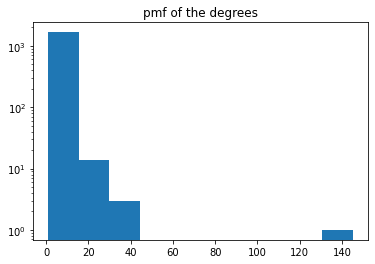

In [ ]:
plt.hist(freq_dict.values(),log = True)
plt.title('pmf of the degrees')
plt.show()

In [ ]:
print('most frequent words in the CNN pulled csv \n')
print([key for key in freq_dict.keys() if freq_dict[key]>15])   

most frequent words in the CNN pulled csv 

['covid19', 'vaccine', 'covid', 'new', 'health', 'pandemic', 'vaccines', 'us', 'vaccinated', 'people', 'said', 'children', 'variant', 'coronavirus', 'year', 'world', 'country', 'officials']


In [ ]:
## Adjacency matrix building
def adj_matrix(freq_dict,cleaned_df_text):   

  words = sorted(list(freq_dict.keys()))

  A = pd.DataFrame(np.zeros((len(words),len(words))), columns = words, index = words )

  for phrase in cleaned_df_text:

    words_list = [word for word in words if word in phrase]

    couples = [(words_list[i],words_list[j]) for i in range(len(words_list)) for j in range(i+1,len(words_list))]

    for w1,w2 in couples:

          A.loc[w1,w2] += 1

  return np.maximum( A, A.transpose() )


In [ ]:
A = adj_matrix(freq_dict,cleaned_df_text)   #version to improve for efficiency

spy plot of the adjacency matrix



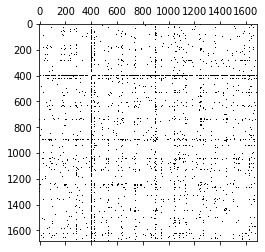

frequency table of bigrams of CNN csv (ordered by alphanumeric order) 

        10  100  10000  10day   11  11yearolds  ...   “i  “is  “race  “the  “we    …
10     0.0  4.0    2.0    1.0  0.0         0.0  ...  0.0  0.0    0.0   0.0  0.0  0.0
100    4.0  0.0    2.0    0.0  0.0         0.0  ...  0.0  0.0    0.0   0.0  0.0  0.0
10000  2.0  2.0    0.0    0.0  0.0         0.0  ...  0.0  0.0    0.0   0.0  0.0  0.0
10day  1.0  0.0    0.0    0.0  0.0         0.0  ...  0.0  0.0    0.0   0.0  0.0  0.0
11     0.0  0.0    0.0    0.0  0.0         2.0  ...  0.0  0.0    0.0   0.0  0.0  1.0
...    ...  ...    ...    ...  ...         ...  ...  ...  ...    ...   ...  ...  ...
“is    0.0  0.0    0.0    0.0  0.0         0.0  ...  1.0  0.0    0.0   0.0  0.0  1.0
“race  0.0  0.0    0.0    0.0  0.0         0.0  ...  0.0  0.0    0.0   0.0  0.0  0.0
“the   0.0  0.0    0.0    0.0  0.0         0.0  ...  0.0  0.0    0.0   0.0  0.0  0.0
“we    0.0  0.0    0.0    0.0  0.0         0.0  ...  0.0  0.0    0.0   0.0  0.

In [ ]:
print('spy plot of the adjacency matrix\n')
plt.spy(A)
plt.show()
print('=====================================\nfrequency table of bigrams of CNN csv (ordered by alphanumeric order) \n')
print(A)

In [ ]:
# Constructing the graph object from the adjacency matrix

G = nx.convert_matrix.from_numpy_array(A.to_numpy())
G = nx.relabel_nodes(G , mapping = dict([ (i,sorted(list(freq_dict.keys()))[i]) for i in range(len(freq_dict.keys())) ]) ) 
print('is connected: ',nx.is_connected(G))

is connected:  True


### Pagerank

In [ ]:
# Calculating the pagerank on graph G, teleportation probability here is 0.15 but since the graph is strongly connected we can set it to zero if we want
pr = nx.algorithms.pagerank(G,alpha = 1)
pr = dict(sorted(pr.items(), key=lambda item: item[1],reverse  = True))

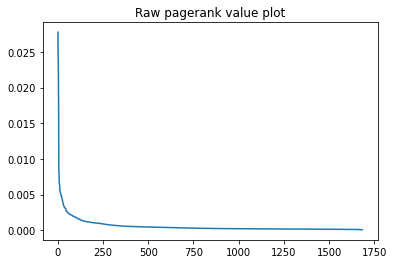

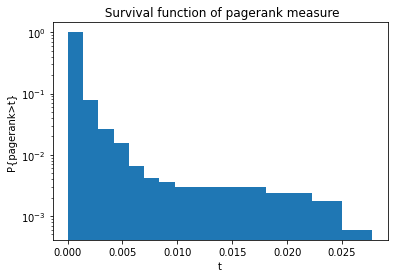

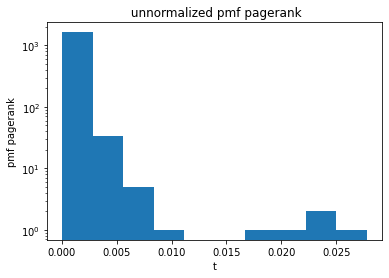

In [ ]:
plt.plot(list(pr.values()))
plt.title('Raw pagerank value plot')
plt.show()

print('\n=================================================')

plt.hist(list(pr.values()),log = True,cumulative=-1 ,bins = 20,density  = True)
plt.xlabel('t')
plt.ylabel('P{pagerank>t}')
plt.title(' Survival function of pagerank measure')
plt.show()

print('\n=================================================')

plt.hist(list(pr.values()),log = True ,cumulative = 0 )
plt.xlabel('t')
plt.ylabel('pmf pagerank')
plt.title(' unnormalized pmf pagerank')
plt.show()

With this plot we can filtrate out meaningful words by choosing a threshold on the pagerank. As a tentative, we filter out by thresholding at the last step, so we take only words with a pagerank value > 0.020

In [ ]:
def threshold(vector,threshold):

  l = [(el,vector[el]) for el in vector if vector[el] >= threshold ]

  print(pd.DataFrame(l))

  return 

In [ ]:
threshold(pr,0.020)

         0         1
0    covid  0.027771
1       19  0.024308
2  covid19  0.024032
3       de  0.021051


filtering out by using thresholds we can selected new meaningful keywords to use in order to get new data.

In [ ]:
threshold(pr,0.003)

              0         1
0         covid  0.027771
1            19  0.024308
2       covid19  0.024032
3            de  0.021051
4            us  0.017186
5           day  0.008456
6       vaccine  0.008200
7           ron  0.006810
8           der  0.006530
9           new  0.006385
10          man  0.006233
11       nation  0.005455
12          ill  0.005391
13           go  0.005329
14          end  0.005280
15          eve  0.005228
16    vaccinate  0.005024
17          era  0.004882
18   vaccinated  0.004855
19         year  0.004854
20        count  0.004835
21       health  0.004630
22          age  0.004471
23     pandemic  0.004424
24        virus  0.004324
25          use  0.004243
26          one  0.003990
27         said  0.003961
28        child  0.003824
29          sit  0.003761
30     children  0.003548
31       people  0.003497
32       travel  0.003464
33     official  0.003400
34        world  0.003299
35  coronavirus  0.003286
36          get  0.003216
37        st

There's a pick in pagerank value around 0.02, we extract this words and use this ones as new keywords for a new twitter pull.

Since the graph is undirected hubs and authorities are the same thing.

### Betweenness centrality

In [ ]:
bet_centr = nx.betweenness_centrality(G)
bet_centr = dict(sorted(bet_centr.items(), key=lambda item: item[1],reverse  = True))

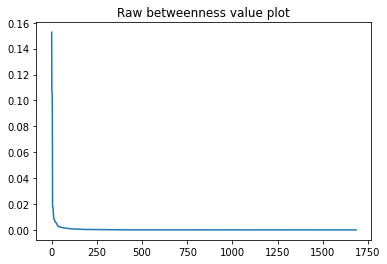

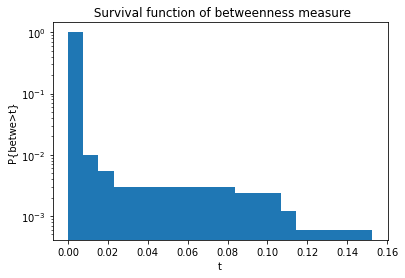

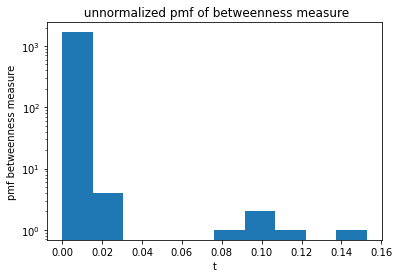

In [ ]:
plt.plot(list(bet_centr.values()))
plt.title('Raw betweenness value plot')
plt.show()

print('\n=================================================')

plt.hist(list(bet_centr.values()),log = True,cumulative=-1 ,bins = 20,density  = True)
plt.xlabel('t')
plt.ylabel('P{betwe>t}')
plt.title(' Survival function of betweenness measure')
plt.show()

print('\n=================================================')

plt.hist(list(bet_centr.values()),log = True ,cumulative = 0 )
plt.xlabel('t')
plt.ylabel('pmf betweenness measure')
plt.title(' unnormalized pmf of betweenness measure')
plt.show()

In [ ]:
threshold(bet_centr,0.0018)

              0         1
0         covid  0.152629
1            19  0.106907
2       covid19  0.106502
3            de  0.103712
4            us  0.077145
5       vaccine  0.018164
6           man  0.017596
7           day  0.017509
8           ron  0.015969
9            go  0.013022
10         year  0.011922
11          new  0.010531
12          era  0.008454
13          der  0.008320
14       health  0.008097
15          end  0.007974
16          one  0.007793
17          eve  0.007415
18          ill  0.006733
19         said  0.006235
20    vaccinate  0.006101
21     pandemic  0.005781
22       nation  0.005753
23   vaccinated  0.005642
24        virus  0.005504
25          age  0.005502
26          use  0.005374
27        count  0.005114
28          sit  0.004875
29          say  0.004184
30          get  0.004052
31  coronavirus  0.003760
32       people  0.003699
33        world  0.003303
34         work  0.003267
35        child  0.003058
36          old  0.002931
37     child

### closeness centrality

In [ ]:
close_centr = nx.closeness_centrality(G)
close_centr = dict(sorted(close_centr.items(), key=lambda item: item[1],reverse  = True))

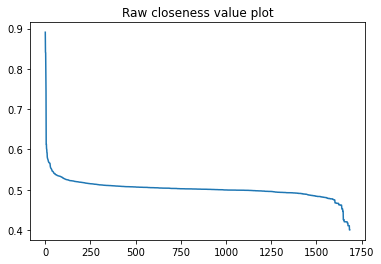

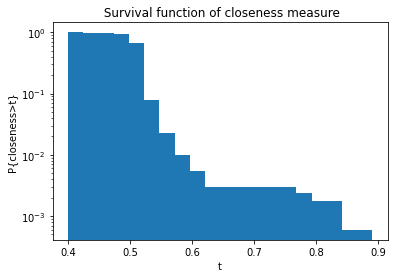

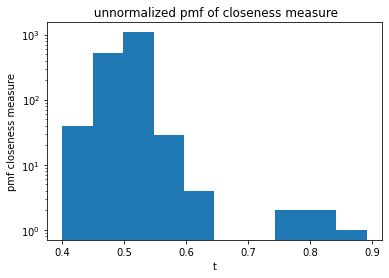

In [ ]:
plt.plot(list(close_centr.values()))
plt.title('Raw closeness value plot')
plt.show()

print('\n=================================================')

plt.hist(list(close_centr.values()),log = True,cumulative=-1 ,bins = 20,density  = True)
plt.xlabel('t')
plt.ylabel('P{closeness>t}')
plt.title(' Survival function of closeness measure')
plt.show()

print('\n=================================================')

plt.hist(list(close_centr.values()),log = True ,cumulative = 0 )
plt.xlabel('t')
plt.ylabel('pmf closeness measure')
plt.title(' unnormalized pmf of closeness measure')
plt.show()

In [ ]:
threshold(close_centr,0.54)

              0         1
0         covid  0.891005
1            19  0.841159
2       covid19  0.840319
3            de  0.789128
4            us  0.744145
5           day  0.613032
6       vaccine  0.613032
7           man  0.600999
8           ron  0.600571
9            go  0.592124
10          new  0.591708
11          der  0.580890
12         year  0.578495
13          end  0.576712
14          era  0.575726
15          ill  0.574548
16       nation  0.572205
17          eve  0.570654
18    vaccinate  0.569111
19          use  0.568919
20         said  0.567385
21       health  0.567003
22   vaccinated  0.566813
23          one  0.566431
24        virus  0.566431
25          age  0.565670
26     pandemic  0.565101
27        count  0.559654
28          sit  0.557063
29  coronavirus  0.555409
30       people  0.553765
31        child  0.553401
32          say  0.552856
33          get  0.552312
34     children  0.550867
35           eu  0.550147
36        world  0.549429
37     offic

### Katz centrality (it just required too many iterations to reach convergence)

### TF-IDF

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(1,1))   # ngram range can be changed to obtain measures regarding n grams instead of single words

X = tfidf.fit_transform(cleaned_df_text).toarray()    # entry (i,j) if Tfidf measure of word_list[j] in document i

word_list = tfidf.get_feature_names_out()

In [ ]:
tfidf_df = pd.DataFrame(X,columns = word_list)

tfidf_df

,10,100,10000,10day,11,11yearolds,15,150,16,18,19,1918,20,200000,2019,2020,2020n,2021,2022,20yearold,21n,24,25,3000,32,33,36,37000,39yearold,50,50year,511,61,65,736,7500,76ers,830,89,8nnthe,...,whether,white,widespread,wife,wild,winsome,winter,withdrawing,without,woke,woman,wondering,work,workers,working,works,world,worried,worry,worse,worst,would,wreaked,writes,wuhan,xa0shares,year,yearnnthey,years,yet,york,youll,young,younger,youre,youth,yvonne,zients,zones,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.262394,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.243889,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.246747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.188922,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.295452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.273397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.16634,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.239101,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
tfidf_word_measure = np.mean(tfidf_df,axis = 0)

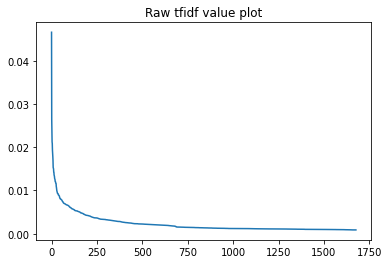

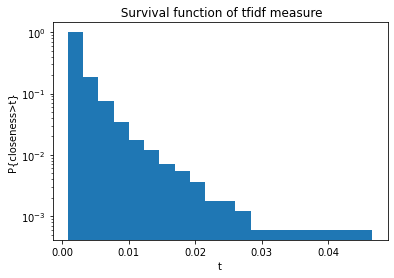

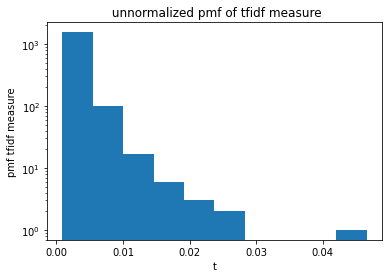

In [ ]:
plt.plot(sorted(list(tfidf_word_measure),reverse = True))
plt.title('Raw tfidf value plot')
plt.show()

print('\n=================================================')

plt.hist(list(tfidf_word_measure),log = True,cumulative=-1 ,bins = 20,density  = True)
plt.xlabel('t')
plt.ylabel('P{closeness>t}')
plt.title(' Survival function of tfidf measure')
plt.show()

print('\n=================================================')

plt.hist(list(tfidf_word_measure),log = True ,cumulative = 0 )
plt.xlabel('t')
plt.ylabel('pmf tfidf measure')
plt.title(' unnormalized pmf of tfidf measure')
plt.show()

In [ ]:
threshold(dict([(word,tfidf_df[word].loc[1] ) for word in word_list]) ,0.001)     #pretty stable measure, this are a way more significant than all the others

            0         1
0   according  0.235083
1     anthony  0.280911
2     covid19  0.085191
3     current  0.334169
4      faucin  0.334169
5        know  0.280911
6     omicron  0.225373
7   resistant  0.334169
8      states  0.230025
9         two  0.253593
10     united  0.261354
11   vaccines  0.197498
12    variant  0.200334
13      weeks  0.261354
14    whether  0.246747


# BBC keywords from first sample (useful to get insights on new words to search)

In [ ]:
os.chdir('/content/drive/MyDrive/NS_project_data')    

In [ ]:
BBC_df = pd.read_csv('/content/drive/MyDrive/NS_project_data/data/BBC_all_tweets_df.csv')

In [ ]:
BBC_df

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,quote_count,reply_count,retweet_count,favorite_count,entities,favorited,retweeted,possibly_sensitive,filter_level,lang,matching_rules,retweeted_status,extended_tweet,display_text_range,extended_entities
0,Mon Nov 29 04:20:10 +0000 2021,1465173715856105472,1465173715856105472,Covid: Dutch police arrest quarantine hotel es...,"<a href=""http://www.socialflow.com"" rel=""nofol...",False,NaN,NaN,NaN,NaN,NaN,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",NaN,NaN,NaN,NaN,False,16,30,101,338,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,False,low,en,[{'tag': None}],NaN,NaN,NaN,NaN
1,Sun Nov 28 15:57:17 +0000 2021,1464986764809019399,1464986764809019399,Can US troops be punished for refusing Covid j...,"<a href=""http://www.socialflow.com"" rel=""nofol...",False,NaN,NaN,NaN,NaN,NaN,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",NaN,NaN,NaN,NaN,False,8,87,33,240,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,False,low,en,[{'tag': None}],NaN,NaN,NaN,NaN
2,Sun Nov 28 15:37:02 +0000 2021,1464981666682834960,1464981666682834960,Covid-positive Czech president appoints new PM...,"<a href=""http://www.socialflow.com"" rel=""nofol...",False,NaN,NaN,NaN,NaN,NaN,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",NaN,NaN,NaN,NaN,False,84,87,258,1048,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,False,low,en,[{'tag': None}],NaN,NaN,NaN,NaN
3,Sun Nov 28 04:32:48 +0000 2021,1464814509634338820,1464814509634338820,Covid: Netherlands enters partial lockdown ami...,"<a href=""http://www.socialflow.com"" rel=""nofol...",False,NaN,NaN,NaN,NaN,NaN,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",NaN,NaN,NaN,NaN,False,16,50,190,528,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,False,low,en,[{'tag': None}],NaN,NaN,NaN,NaN
4,Sun Nov 28 03:25:14 +0000 2021,1464797506404036609,1464797506404036609,Covid: Israel to impose travel ban for foreign...,"<a href=""http://www.socialflow.com"" rel=""nofol...",False,NaN,NaN,NaN,NaN,NaN,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",NaN,NaN,NaN,NaN,False,17,70,116,461,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,False,low,en,[{'tag': None}],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Sun Oct 31 17:35:33 +0000 2021,1454864634838724608,1454864634838724608,RT @BBCSteveR: As Russia reports a new record ...,"<a href=""https://about.twitter.com/products/tw...",False,NaN,NaN,NaN,NaN,NaN,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",NaN,NaN,NaN,NaN,False,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,NaN,low,en,[{'tag': None}],{'created_at': 'Sun Oct 31 17:18:39 +0000 2021...,NaN,NaN,NaN
106,Sat Oct 30 11:59:15 +0000 2021,1454417611949854723,1454417611949854723,"Covid-19 origins may never be known, US intell...","<a href=""http://www.socialflow.com"" rel=""nofol...",False,NaN,NaN,NaN,NaN,NaN,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",NaN,NaN,NaN,NaN,False,72,403,187,768,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,False,low,en,[{'tag': None}],NaN,NaN,NaN,NaN
107,Sat Oct 30 09:46:05 +0000 2021,1454384101805416450,1454384101805416450,Climate and Covid top agenda as world leaders ...,"<a href=""http://www.socialflow.com"" rel=""nofol...",False,NaN,NaN,NaN,NaN,NaN,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",NaN,NaN,NaN,NaN,False,8,75,87,317,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,False,low,en,[{'tag': None}],NaN,NaN,NaN,NaN
108,Sat Oct 30 09:26:05 +0000 2021,1454379068858769413,1454379068858769413,How lifting Kenya's Covid curfew may push reve...,"<a href=""http://www.socialflow.com"" rel=""nofol...",False,NaN,NaN,NaN,N

In [ ]:
df_text = extract_text(BBC_df)
cleaned_df_text = [cleaner(el) for el in df_text]

freq_dict = frequency_dictionary(cleaned_df_text)
freq_dict = dict(sorted(freq_dict.items(), key=lambda item: item[1],reverse = True))   #order from more frequent to less frequent word

In [ ]:
cleaned_df_text[0:10]

['covid dutch police arrest quarantine hotel escapee couple',
 'us troops punished refusing covid jabs',
 'covidpositive czech president appoints new pm inside plexiglass box',
 'covid netherlands enters partial lockdown amid surging infections',
 'covid israel impose travel ban foreigners new variant',
 'covid variants vaccines still work',
 '“we’ve fastest vaccine rollout europe fastest booster campaign europe” prime minister boris johnson…',
 'new omicron covid variant concern world health organization says',
 'teaching union concerned covid rates jersey',
 'two cases new variant covid detected uk']

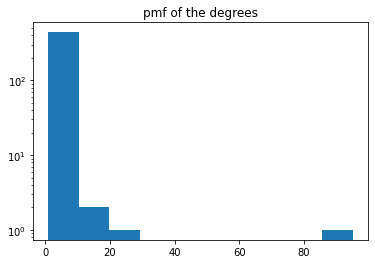

In [ ]:
plt.hist(freq_dict.values(),log = True)
plt.title('pmf of the degrees')
plt.show()

In [ ]:
print('most frequent words in the CNN pulled csv \n')
print([key for key in freq_dict.keys() if freq_dict[key]>15])   

most frequent words in the CNN pulled csv 

['covid', 'new']


In [ ]:
A = adj_matrix(freq_dict,cleaned_df_text)   #version to improve for efficiency

spy plot of the adjacency matrix



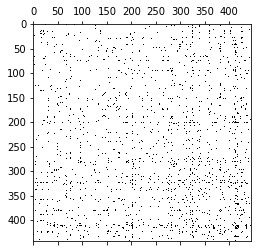

frequency table of bigrams of CNN csv (ordered by alphanumeric order) 

           100000   12   16  500000  ...  zero  zerocovid  ‘waning  “we’ve
100000        0.0  0.0  0.0     0.0  ...   0.0        0.0      0.0     0.0
12            0.0  0.0  0.0     0.0  ...   0.0        0.0      0.0     0.0
16            0.0  0.0  0.0     0.0  ...   0.0        0.0      0.0     0.0
500000        0.0  0.0  0.0     0.0  ...   0.0        0.0      0.0     0.0
511           0.0  0.0  0.0     0.0  ...   0.0        0.0      0.0     0.0
...           ...  ...  ...     ...  ...   ...        ...      ...     ...
worried       0.0  0.0  0.0     0.0  ...   0.0        0.0      1.0     0.0
zero          0.0  0.0  0.0     0.0  ...   0.0        1.0      0.0     0.0
zerocovid     0.0  0.0  0.0     0.0  ...   1.0        0.0      0.0     0.0
‘waning       0.0  0.0  0.0     0.0  ...   0.0        0.0      0.0     0.0
“we’ve        0.0  0.0  0.0     0.0  ...   0.0        0.0      0.0     0.0

[444 rows x 444 columns]


In [ ]:
print('spy plot of the adjacency matrix\n')
plt.spy(A)
plt.show()
print('=====================================\nfrequency table of bigrams of CNN csv (ordered by alphanumeric order) \n')
print(A)

In [ ]:
# Constructing the graph object from the adjacency matrix

G = nx.convert_matrix.from_numpy_array(A.to_numpy())
G = nx.relabel_nodes(G , mapping = dict([ (i,sorted(list(freq_dict.keys()))[i]) for i in range(len(freq_dict.keys())) ]) ) 
print('is connected: ',nx.is_connected(G))

is connected:  True


### Pagerank

In [ ]:
# Calculating the pagerank on graph G, teleportation probability here is 0.15 but since the graph is strongly connected we can set it to zero if we want
pr = nx.algorithms.pagerank(G,alpha = 1)
pr = dict(sorted(pr.items(), key=lambda item: item[1],reverse  = True))

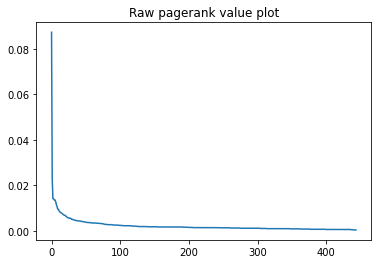

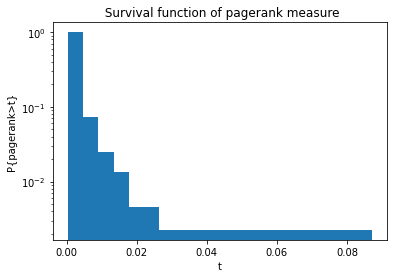

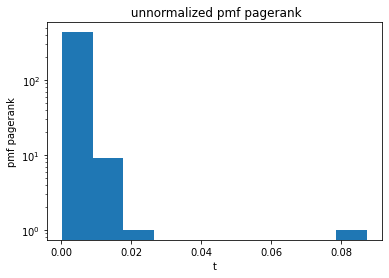

In [ ]:
plt.plot(list(pr.values()))
plt.title('Raw pagerank value plot')
plt.show()

print('\n=================================================')

plt.hist(list(pr.values()),log = True,cumulative=-1 ,bins = 20,density  = True)
plt.xlabel('t')
plt.ylabel('P{pagerank>t}')
plt.title(' Survival function of pagerank measure')
plt.show()

print('\n=================================================')

plt.hist(list(pr.values()),log = True ,cumulative = 0 )
plt.xlabel('t')
plt.ylabel('pmf pagerank')
plt.title(' unnormalized pmf pagerank')
plt.show()

With this plot we can filtrate out meaningful words by choosing a threshold on the pagerank. As a tentative, we filter out by thresholding at the last step, so we take only words with a pagerank value > 0.020

In [ ]:
threshold(pr,0.020)

       0         1
0  covid  0.087225
1    new  0.022646


filtering out by using thresholds we can selected new meaningful keywords to use in order to get new data.

In [ ]:
threshold(pr,0.003)

          0         1
0     covid  0.087225
1       new  0.022646
2   vaccine  0.014110
3        us  0.014004
4   variant  0.013537
..      ...       ...
71   impose  0.003217
72    still  0.003144
73   curfew  0.003133
74      two  0.003130
75     risk  0.003041

[76 rows x 2 columns]


There's a pick in pagerank value around 0.02, we extract this words and use this ones as new keywords for a new twitter pull.

Since the graph is undirected hubs and authorities are the same thing.

### Betweenness centrality

In [ ]:
bet_centr = nx.betweenness_centrality(G)
bet_centr = dict(sorted(bet_centr.items(), key=lambda item: item[1],reverse  = True))

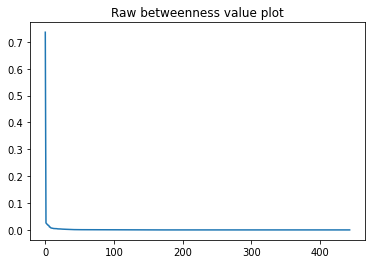

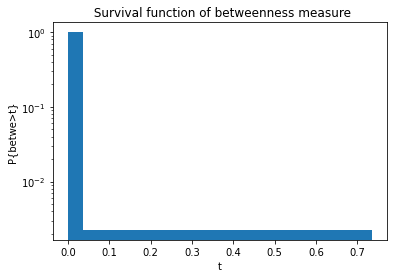

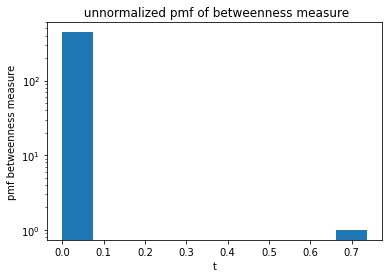

In [ ]:
plt.plot(list(bet_centr.values()))
plt.title('Raw betweenness value plot')
plt.show()

print('\n=================================================')

plt.hist(list(bet_centr.values()),log = True,cumulative=-1 ,bins = 20,density  = True)
plt.xlabel('t')
plt.ylabel('P{betwe>t}')
plt.title(' Survival function of betweenness measure')
plt.show()

print('\n=================================================')

plt.hist(list(bet_centr.values()),log = True ,cumulative = 0 )
plt.xlabel('t')
plt.ylabel('pmf betweenness measure')
plt.title(' unnormalized pmf of betweenness measure')
plt.show()

In [ ]:
threshold(bet_centr,0.0018)

               0         1
0          covid  0.736007
1            new  0.025935
2        vaccine  0.022788
3             us  0.020037
4         europe  0.017466
5           test  0.016919
6           rica  0.011089
7      infection  0.010818
8          child  0.007759
9       children  0.006864
10      lockdown  0.006291
11      pandemic  0.006072
12         world  0.005202
13        people  0.005110
14            uk  0.004966
15           war  0.004839
16       covid19  0.004608
17       variant  0.004537
18         india  0.003908
19       booster  0.003887
20           say  0.003753
21         johns  0.003605
22          case  0.003531
23          safe  0.003193
24  restrictions  0.003021
25          fast  0.002926
26        school  0.002879
27           get  0.002748
28         south  0.002571
29          full  0.002380
30           on…  0.002325
31         death  0.002191
32        record  0.002164
33        africa  0.001976
34      hospital  0.001869


### closeness centrality

In [ ]:
close_centr = nx.closeness_centrality(G)
close_centr = dict(sorted(close_centr.items(), key=lambda item: item[1],reverse  = True))

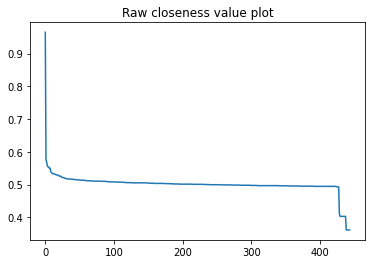

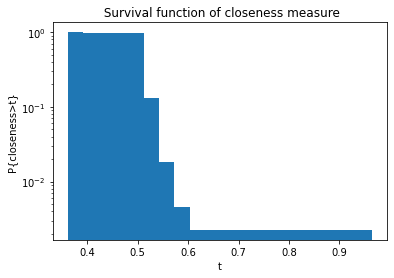

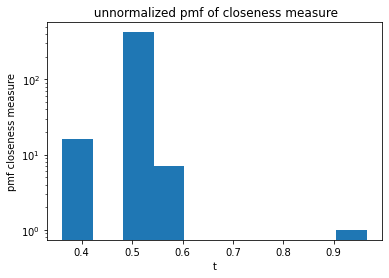

In [ ]:
plt.plot(list(close_centr.values()))
plt.title('Raw closeness value plot')
plt.show()

print('\n=================================================')

plt.hist(list(close_centr.values()),log = True,cumulative=-1 ,bins = 20,density  = True)
plt.xlabel('t')
plt.ylabel('P{closeness>t}')
plt.title(' Survival function of closeness measure')
plt.show()

print('\n=================================================')

plt.hist(list(close_centr.values()),log = True ,cumulative = 0 )
plt.xlabel('t')
plt.ylabel('pmf closeness measure')
plt.title(' unnormalized pmf of closeness measure')
plt.show()

In [ ]:
threshold(close_centr,0.54)

           0         1
0      covid  0.965142
1        new  0.576823
2         us  0.567949
3    vaccine  0.557233
4       rica  0.553750
5  infection  0.553059
6     europe  0.549628
7       test  0.549628


### Katz centrality (it just required too many iterations to reach convergence)

### TF-IDF

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(1,1))   # ngram range can be changed to obtain measures regarding n grams instead of single words

X = tfidf.fit_transform(cleaned_df_text).toarray()    # entry (i,j) if Tfidf measure of word_list[j] in document i

word_list = tfidf.get_feature_names_out()

In [ ]:
tfidf_df = pd.DataFrame(X,columns = word_list)

tfidf_df

,100000,12,16,500000,511,61,65s,700000,89,aaron,abuse,accept,according,achieve,adults,affected,africa,african,aged,agencies,agenda,air,aircrew,airline,allow,amazon,american,americans,americas,amid,amsterdam,angela,answers,appoints,approve,approves,around,arrest,arrived,arriving,...,unlikely,untruths,unvaccinated,us,use,vaccinated,vaccination,vaccine,vaccinenn,vaccines,valentina,varia,variant,variantnn,variants,ve,violent,vote,vulnerable,walls,waning,war,warning,warnings,warns,water,wave,we,weeks,western,whose,within,work,workers,working,world,worldwide,worried,zero,zerocovid
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.40004,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.404623,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.348392,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.365679,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.265058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.30879,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.354526,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.305539,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.368672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250389,0.0,0.0,0.0,0.0
108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
tfidf_word_measure = np.mean(tfidf_df,axis = 0)

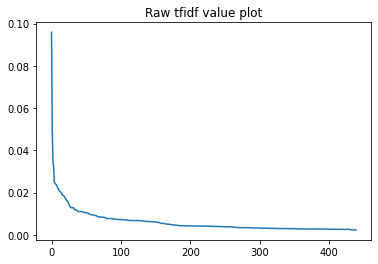

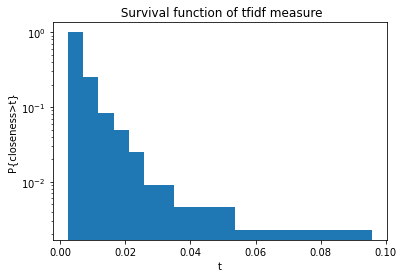

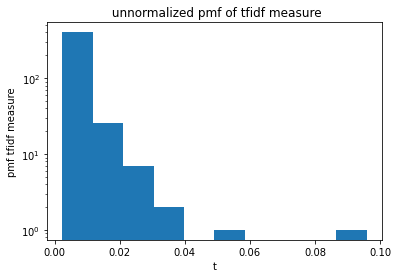

In [ ]:
plt.plot(sorted(list(tfidf_word_measure),reverse = True))
plt.title('Raw tfidf value plot')
plt.show()

print('\n=================================================')

plt.hist(list(tfidf_word_measure),log = True,cumulative=-1 ,bins = 20,density  = True)
plt.xlabel('t')
plt.ylabel('P{closeness>t}')
plt.title(' Survival function of tfidf measure')
plt.show()

print('\n=================================================')

plt.hist(list(tfidf_word_measure),log = True ,cumulative = 0 )
plt.xlabel('t')
plt.ylabel('pmf tfidf measure')
plt.title(' unnormalized pmf of tfidf measure')
plt.show()

In [ ]:
threshold(dict([(word,tfidf_df[word].loc[1] ) for word in word_list]) ,0.001)     #pretty stable measure, this are a way more significant than all the others

          0         1
0     covid  0.106211
1      jabs  0.404623
2  punished  0.469496
3  refusing  0.469496
4    troops  0.469496
5        us  0.404623


# Reuters keywords from first sample (useful to get insights on new words to search)

In [ ]:
os.chdir('/content/drive/MyDrive/NS_project_data')    

In [ ]:
R_df = pd.read_csv('/content/drive/MyDrive/NS_project_data/data/Reuters_all_tweets_df.csv')

In [ ]:
R_df

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,quote_count,reply_count,retweet_count,favorite_count,entities,extended_entities,favorited,retweeted,possibly_sensitive,filter_level,lang,matching_rules,extended_tweet,retweeted_status
0,Mon Nov 29 10:00:27 +0000 2021,1465259352055554058,1465259352055554058,S.Korea shelves plans to ease COVID measures d...,"[0, 100]","<a href=""https://trueanthem.com/"" rel=""nofollo...",False,NaN,NaN,NaN,NaN,NaN,"{'id': 1652541, 'id_str': '1652541', 'name': '...",NaN,NaN,NaN,NaN,False,1,7,11,14,"{'hashtags': [], 'urls': [{'url': 'https://t.c...","{'media': [{'id': 1465259350172344323, 'id_str...",False,False,False,low,en,[{'tag': None}],NaN,NaN
1,Mon Nov 29 09:55:15 +0000 2021,1465258044879691781,1465258044879691781,Thermo Fisher says its COVID-19 tests accurate...,"[0, 96]","<a href=""https://trueanthem.com/"" rel=""nofollo...",False,NaN,NaN,NaN,NaN,NaN,"{'id': 1652541, 'id_str': '1652541', 'name': '...",NaN,NaN,NaN,NaN,False,3,6,21,34,"{'hashtags': [], 'urls': [{'url': 'https://t.c...","{'media': [{'id': 1465258043013279750, 'id_str...",False,False,False,low,en,[{'tag': None}],NaN,NaN
2,Mon Nov 29 09:20:19 +0000 2021,1465249253002035201,1465249253002035201,Portugal detects 13 cases of Omicron COVID-19 ...,"[0, 77]","<a href=""https://trueanthem.com/"" rel=""nofollo...",False,NaN,NaN,NaN,NaN,NaN,"{'id': 1652541, 'id_str': '1652541', 'name': '...",NaN,NaN,NaN,NaN,False,21,18,84,149,"{'hashtags': [], 'urls': [{'url': 'https://t.c...","{'media': [{'id': 1465249250816802819, 'id_str...",False,False,False,low,en,[{'tag': None}],NaN,NaN
3,Mon Nov 29 09:10:18 +0000 2021,1465246732112080897,1465246732112080897,"Omicron threatens oil demand recovery, already...","[0, 105]","<a href=""https://trueanthem.com/"" rel=""nofollo...",False,NaN,NaN,NaN,NaN,NaN,"{'id': 1652541, 'id_str': '1652541', 'name': '...",NaN,NaN,NaN,NaN,False,9,15,19,45,"{'hashtags': [], 'urls': [{'url': 'https://t.c...","{'media': [{'id': 1465246730392322048, 'id_str...",False,False,False,low,en,[{'tag': None}],NaN,NaN
4,Mon Nov 29 08:05:17 +0000 2021,1465230370861895685,1465230370861895685,New Zealand to ease COVID measures this week d...,"[0, 96]","<a href=""https://trueanthem.com/"" rel=""nofollo...",False,NaN,NaN,NaN,NaN,NaN,"{'id': 1652541, 'id_str': '1652541', 'name': '...",NaN,NaN,NaN,NaN,False,4,12,23,64,"{'hashtags': [], 'urls': [{'url': 'https://t.c...","{'media': [{'id': 1465230369054203909, 'id_str...",False,False,False,low,en,[{'tag': None}],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,Sat Oct 30 02:55:00 +0000 2021,1454280647371943936,1454280647371943936,The U.S. FDA authorized the Pfizer vaccine for...,"[0, 140]","<a href=""https://studio.twitter.com"" rel=""nofo...",True,NaN,NaN,NaN,NaN,NaN,"{'id': 1652541, 'id_str': '1652541', 'name': '...",NaN,NaN,NaN,NaN,False,21,37,83,210,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,False,False,False,low,en,[{'tag': None}],{'full_text': 'The U.S. FDA authorized the Pfi...,NaN
1140,Sat Oct 30 02:20:28 +0000 2021,1454271959022374915,1454271959022374915,U.S. administers over 419 mln doses of COVID-1...,"[0, 86]","<a href=""https://trueanthem.com/"" rel=""nofollo...",False,NaN,NaN,NaN,NaN,NaN,"{'id': 1652541, 'id_str': '1652541', 'name': '...",NaN,NaN,NaN,NaN,False,3,7,13,55,"{'hashtags': [], 'urls': [{'url': 'https://t.c...","{'media': [{'id': 1454271957298565120, 'id_str...",False,False,False,low,en,[{'tag': None}],NaN,NaN
1141,Sat Oct 30 00:45:00 +0000 2021,1454247931771502595,1454247931771502595,The U.S. Food and Drug Administration authoriz...,"[0, 140]","<a href=""https://studio.twitter.com"" rel=""nofo...",True,NaN,NaN,NaN,NaN,NaN,"{'id': 1652541, 'id_str': '1652541', 'name': '...",NaN,NaN

In [ ]:
df_text = extract_text(R_df)
cleaned_df_text = [cleaner(el) for el in df_text]

freq_dict = frequency_dictionary(cleaned_df_text)
freq_dict = dict(sorted(freq_dict.items(), key=lambda item: item[1],reverse = True))   #order from more frequent to less frequent word

In [ ]:
cleaned_df_text[0:10]

['skorea shelves plans ease covid measures due high case count omicron',
 'thermo fisher says covid19 tests accurately detects omicron variant',
 'portugal detects 13 cases omicron covid19 variant',
 'omicron threatens oil demand recovery already hit europes rising covid cases',
 'new zealand ease covid measures week despite omicron threat pm',
 'parts northern china tighten curbs new covid19 flareups',
 'first suspected case omicron variant covid19 detected switzerland',
 'dutch police arrest couple attempting flee quarantine spain',
 'thermo fisher says covid19 tests accurately detects omicron variant',
 'beijing’s bet covidzero worsens odds wynn macau sands china rivals draconian restrictions plus fresh clampdown vips delay recovery worlds largest casino hub says']

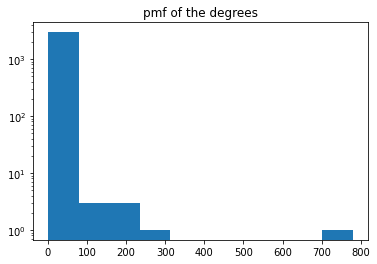

In [ ]:
plt.hist(freq_dict.values(),log = True)
plt.title('pmf of the degrees')
plt.show()

In [ ]:
print('most frequent words in the CNN pulled csv \n')
print([key for key in freq_dict.keys() if freq_dict[key]>15])   

most frequent words in the CNN pulled csv 

['covid19', 'covid', 'new', 'us', 'vaccine', 'cases', 'variant', 'said', 'health', 'says', 'booster', 'vaccines', 'first', 'record', 'pill', 'travel', 'shots', 'lockdown', 'europe', 'restrictions', 'south', 'africa', 'pfizer', 'uk', 'deaths', 'curbs', 'shot', 'dutch', 'children', 'doses', 'measures', 'countries', 'surge', 'infections', 'people', 'biden', 'country', 'minister', 'coronavirus', 'pandemic', 'austria', 'government', 'vaccinated', 'omicron', 'eu', 'daily', 'germany', 'reports', 'adults', 'china', 'mandate', 'cdc', 'president', 'britain', 'amid', 'rules', 'wave', 'global', 'hit', 'use', 'hospitals', 'states', 'drug', 'time', 'back', 'data', 'last', 'vaccination', 'unvaccinated', 'moderna', 'week', 'risk', 'mln', 'france', 'world', 'year', 'rise', 'winter', 'antiviral', 'due', 'rising', 'vaccinations', 'may', 'high', 'african', 'one', 'ahead', 'million', 'public', 'billion', 'administration', 'european', 'pfizers', 'border', 'test', 

In [ ]:
A = adj_matrix(freq_dict,cleaned_df_text)   #version to improve for efficiency

spy plot of the adjacency matrix



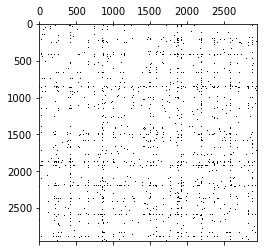

frequency table of bigrams of CNN csv (ordered by alphanumeric order) 

             10   100  10000  100000  105  ...  “we    …   ⚡️  ⚡️austria    👇
10          0.0  13.0    4.0     3.0  2.0  ...  0.0  0.0  0.0        0.0  0.0
100        13.0   0.0    4.0     3.0  0.0  ...  0.0  0.0  0.0        0.0  0.0
10000       4.0   4.0    0.0     3.0  0.0  ...  0.0  0.0  0.0        0.0  0.0
100000      3.0   3.0    3.0     0.0  0.0  ...  0.0  0.0  0.0        0.0  0.0
105         2.0   0.0    0.0     0.0  0.0  ...  0.0  0.0  0.0        0.0  0.0
...         ...   ...    ...     ...  ...  ...  ...  ...  ...        ...  ...
“we         0.0   0.0    0.0     0.0  0.0  ...  0.0  0.0  1.0        0.0  0.0
…           0.0   0.0    0.0     0.0  0.0  ...  0.0  0.0  0.0        0.0  0.0
⚡️          0.0   0.0    0.0     0.0  0.0  ...  1.0  0.0  0.0        1.0  0.0
⚡️austria   0.0   0.0    0.0     0.0  0.0  ...  0.0  0.0  1.0        0.0  0.0
👇           0.0   0.0    0.0     0.0  0.0  ...  0.0  0.0  0.0        0

In [ ]:
print('spy plot of the adjacency matrix\n')
plt.spy(A)
plt.show()
print('=====================================\nfrequency table of bigrams of CNN csv (ordered by alphanumeric order) \n')
print(A)

In [ ]:
# Constructing the graph object from the adjacency matrix

G = nx.convert_matrix.from_numpy_array(A.to_numpy())
G = nx.relabel_nodes(G , mapping = dict([ (i,sorted(list(freq_dict.keys()))[i]) for i in range(len(freq_dict.keys())) ]) ) 
print('is connected: ',nx.is_connected(G))

is connected:  True


### Pagerank

In [ ]:
# Calculating the pagerank on graph G, teleportation probability here is 0.15 but since the graph is strongly connected we can set it to zero if we want
pr = nx.algorithms.pagerank(G,alpha = 1)
pr = dict(sorted(pr.items(), key=lambda item: item[1],reverse  = True))

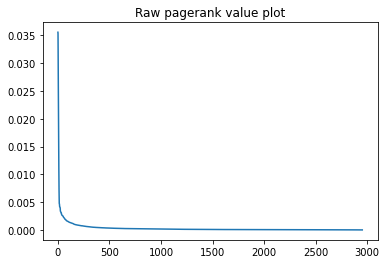

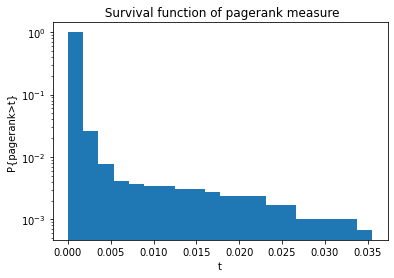

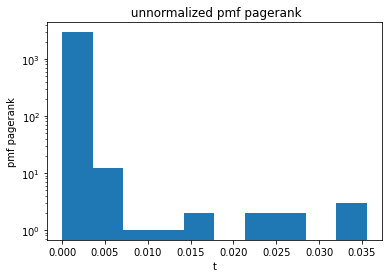

In [ ]:
plt.plot(list(pr.values()))
plt.title('Raw pagerank value plot')
plt.show()

print('\n=================================================')

plt.hist(list(pr.values()),log = True,cumulative=-1 ,bins = 20,density  = True)
plt.xlabel('t')
plt.ylabel('P{pagerank>t}')
plt.title(' Survival function of pagerank measure')
plt.show()

print('\n=================================================')

plt.hist(list(pr.values()),log = True ,cumulative = 0 )
plt.xlabel('t')
plt.ylabel('pmf pagerank')
plt.title(' unnormalized pmf pagerank')
plt.show()

With this plot we can filtrate out meaningful words by choosing a threshold on the pagerank. As a tentative, we filter out by thresholding at the last step, so we take only words with a pagerank value > 0.020

In [ ]:
threshold(pr,0.020)

         0         1
0        c  0.035545
1        v  0.035299
2    covid  0.032440
3        9  0.025756
4  covid19  0.025581
5       st  0.023090
6        b  0.021765


filtering out by using thresholds we can selected new meaningful keywords to use in order to get new data.

In [ ]:
threshold(pr,0.003)

          0         1
0         c  0.035545
1         v  0.035299
2     covid  0.032440
3         9  0.025756
4   covid19  0.025581
5        st  0.023090
6         b  0.021765
7        de  0.016963
8        us  0.015110
9        un  0.010934
10  vaccine  0.007474
11      new  0.007090
12     case  0.004871
13      man  0.004790
14      der  0.004711
15      men  0.004636
16  variant  0.004250
17    cases  0.004158
18     said  0.004136
19       ag  0.004114
20    count  0.004105
21   nation  0.003961
22       eu  0.003958
23     shot  0.003506
24     heal  0.003398
25      age  0.003364
26     test  0.003308
27   health  0.003273
28     rica  0.003206
29      day  0.003165
30       go  0.003105
31     rest  0.003075
32      say  0.003067
33     port  0.003066


There's a pick in pagerank value around 0.02, we extract this words and use this ones as new keywords for a new twitter pull.

Since the graph is undirected hubs and authorities are the same thing.

### Betweenness centrality

In [ ]:
bet_centr = nx.betweenness_centrality(G)
bet_centr = dict(sorted(bet_centr.items(), key=lambda item: item[1],reverse  = True))

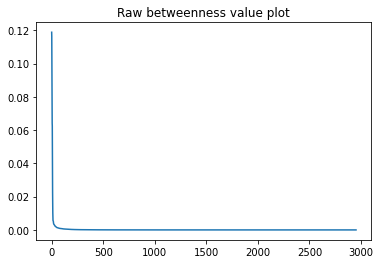

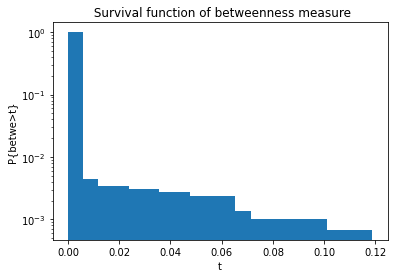

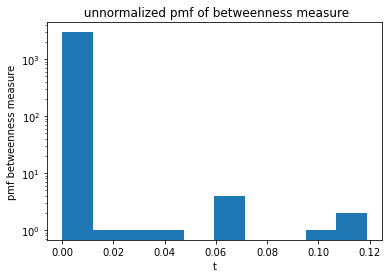

In [ ]:
plt.plot(list(bet_centr.values()))
plt.title('Raw betweenness value plot')
plt.show()

print('\n=================================================')

plt.hist(list(bet_centr.values()),log = True,cumulative=-1 ,bins = 20,density  = True)
plt.xlabel('t')
plt.ylabel('P{betwe>t}')
plt.title(' Survival function of betweenness measure')
plt.show()

print('\n=================================================')

plt.hist(list(bet_centr.values()),log = True ,cumulative = 0 )
plt.xlabel('t')
plt.ylabel('pmf betweenness measure')
plt.title(' unnormalized pmf of betweenness measure')
plt.show()

In [ ]:
threshold(bet_centr,0.0018)

          0         1
0         c  0.118857
1         v  0.116493
2     covid  0.098962
3        st  0.067677
4         9  0.065018
5   covid19  0.064197
6         b  0.062470
7        de  0.043882
8        us  0.033824
9        un  0.022493
10      new  0.010443
11  vaccine  0.010295
12      men  0.006726
13       ag  0.005628
14     said  0.005510
15      der  0.005459
16      man  0.005246
17    count  0.004100
18     case  0.004093
19   nation  0.003718
20      age  0.003539
21       go  0.003447
22  variant  0.003332
23      day  0.003236
24       eu  0.003222
25      end  0.003149
26     heal  0.002988
27      say  0.002977
28     test  0.002775
29   health  0.002748
30     port  0.002539
31      art  0.002481
32    cases  0.002462
33     shot  0.002185
34     rest  0.002173
35      try  0.002153
36    first  0.002099
37     year  0.002059
38     rica  0.002057
39      low  0.001940
40   strict  0.001931
41      ten  0.001866
42   travel  0.001821


### closeness centrality

In [ ]:
close_centr = nx.closeness_centrality(G)
close_centr = dict(sorted(close_centr.items(), key=lambda item: item[1],reverse  = True))

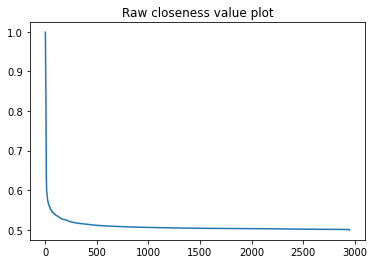

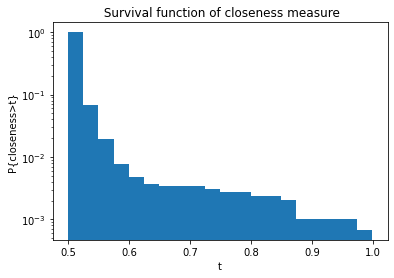

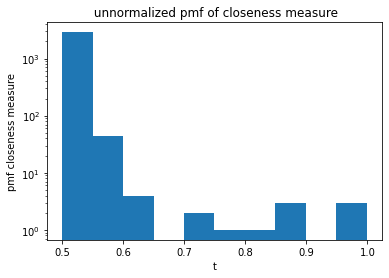

In [ ]:
plt.plot(list(close_centr.values()))
plt.title('Raw closeness value plot')
plt.show()

print('\n=================================================')

plt.hist(list(close_centr.values()),log = True,cumulative=-1 ,bins = 20,density  = True)
plt.xlabel('t')
plt.ylabel('P{closeness>t}')
plt.title(' Survival function of closeness measure')
plt.show()

print('\n=================================================')

plt.hist(list(close_centr.values()),log = True ,cumulative = 0 )
plt.xlabel('t')
plt.ylabel('pmf closeness measure')
plt.title(' unnormalized pmf of closeness measure')
plt.show()

In [ ]:
threshold(close_centr,0.54)

          0         1
0         c  0.998647
1         v  0.994274
2     covid  0.950419
3         9  0.867215
4   covid19  0.864169
..      ...       ...
85     rate  0.541254
86  booster  0.540362
87    break  0.540362
88       ’s  0.540362
89     rule  0.540066

[90 rows x 2 columns]


### Katz centrality (it just required too many iterations to reach convergence)

### TF-IDF

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(1,1))   # ngram range can be changed to obtain measures regarding n grams instead of single words

X = tfidf.fit_transform(cleaned_df_text).toarray()    # entry (i,j) if Tfidf measure of word_list[j] in document i

word_list = tfidf.get_feature_names_out()

In [ ]:
tfidf_df = pd.DataFrame(X,columns = word_list)

tfidf_df

,10,100,10000,100000,105,107,10days,11,11289,11thhour,11yearolds,12,1219,125,13,131,135,14,15,150,155,157,15c,1600,166,17,18,1st,20,2000,20000,2020,2021,2022,20month,21,214,217,22,23,...,workplace,works,world,worlds,worried,worries,worry,worrying,worse,worsens,worst,worth,would,wounded,wrote,wta,wto,wuhan,wynn,xi,year,yearolds,years,yen,yet,yields,york,young,younger,youngest,youths,yr,zealand,zeman,zemmour,zero,zerocovid,zerotolerance,zimbabwe,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.562117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.341799,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.270312,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.277563,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.240649,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.254639,0.0,0.0,0.0,0.0,0.247103,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfidf_word_measure = np.mean(tfidf_df,axis = 0)

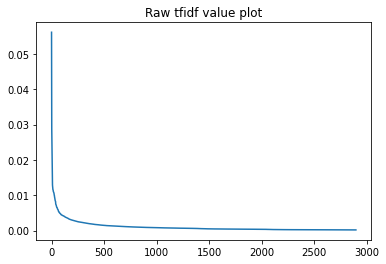

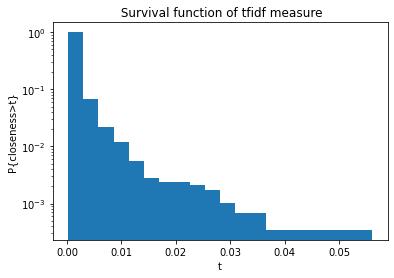

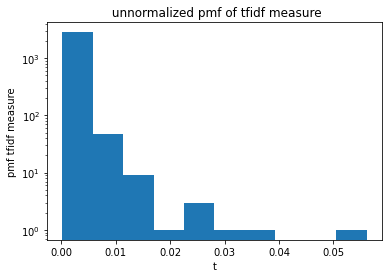

In [ ]:
plt.plot(sorted(list(tfidf_word_measure),reverse = True))
plt.title('Raw tfidf value plot')
plt.show()

print('\n=================================================')

plt.hist(list(tfidf_word_measure),log = True,cumulative=-1 ,bins = 20,density  = True)
plt.xlabel('t')
plt.ylabel('P{closeness>t}')
plt.title(' Survival function of tfidf measure')
plt.show()

print('\n=================================================')

plt.hist(list(tfidf_word_measure),log = True ,cumulative = 0 )
plt.xlabel('t')
plt.ylabel('pmf tfidf measure')
plt.title(' unnormalized pmf of tfidf measure')
plt.show()

In [ ]:
threshold(dict([(word,tfidf_df[word].loc[1] ) for word in word_list]) ,0.001)     #pretty stable measure, this are a way more significant than all the others

            0         1
0  accurately  0.432687
1     covid19  0.086303
2     detects  0.379895
3      fisher  0.432687
4     omicron  0.281424
5        says  0.232132
6       tests  0.336708
7      thermo  0.432687
8     variant  0.200304


# AP keywords from first sample (useful to get insights on new words to search)

In [ ]:
os.chdir('/content/drive/MyDrive/NS_project_data')    

In [ ]:
AP_df = pd.read_csv('/content/drive/MyDrive/NS_project_data/data/AP_all_tweets_df.csv')

In [ ]:
AP_df

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,extended_tweet,quote_count,reply_count,retweet_count,favorite_count,entities,favorited,retweeted,possibly_sensitive,filter_level,lang,matching_rules,retweeted_status,display_text_range
0,Sun Nov 28 21:17:05 +0000 2021,1465067243264528387,1465067243264528387,"""COVID-19 constantly exploits our divisions."" ...","<a href=""http://www.socialflow.com"" rel=""nofol...",True,NaN,NaN,NaN,NaN,NaN,"{'id': 51241574, 'id_str': '51241574', 'name':...",NaN,NaN,NaN,NaN,False,"{'full_text': '""COVID-19 constantly exploits o...",12,49,83,154,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,False,low,en,[{'tag': None}],NaN,NaN
1,Sun Nov 28 16:02:40 +0000 2021,1464988118491312136,1464988118491312136,Swiss voters appear set to approve legislation...,"<a href=""http://www.socialflow.com"" rel=""nofol...",True,NaN,NaN,NaN,NaN,NaN,"{'id': 51241574, 'id_str': '51241574', 'name':...",NaN,NaN,NaN,NaN,False,{'full_text': 'Swiss voters appear set to appr...,15,39,100,576,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,False,low,en,[{'tag': None}],NaN,NaN
2,Sun Nov 28 00:10:06 +0000 2021,1464748396812636163,1464748396812636163,"Cases of the coronavirus' new omicron variant,...","<a href=""http://www.socialflow.com"" rel=""nofol...",True,NaN,NaN,NaN,NaN,NaN,"{'id': 51241574, 'id_str': '51241574', 'name':...",NaN,NaN,NaN,NaN,False,"{'full_text': ""Cases of the coronavirus' new o...",32,107,133,310,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,False,low,en,[{'tag': None}],NaN,NaN
3,Sat Nov 27 20:49:08 +0000 2021,1464697822520000512,1464697822520000512,BREAKING: Italy and Germany both have confirme...,"<a href=""http://www.socialflow.com"" rel=""nofol...",False,NaN,NaN,NaN,NaN,NaN,"{'id': 51241574, 'id_str': '51241574', 'name':...",NaN,NaN,NaN,NaN,False,NaN,204,199,699,1132,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,False,low,en,[{'tag': None}],NaN,NaN
4,Sat Nov 27 19:06:44 +0000 2021,1464672052376481805,1464672052376481805,"RT @AP_Politics: Inflation is up, workers are ...","<a href=""http://www.socialflow.com"" rel=""nofol...",False,NaN,NaN,NaN,NaN,NaN,"{'id': 51241574, 'id_str': '51241574', 'name':...",NaN,NaN,NaN,NaN,False,NaN,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,NaN,low,en,[{'tag': None}],{'created_at': 'Sat Nov 27 19:02:25 +0000 2021...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Sat Oct 30 14:26:29 +0000 2021,1454454665991557120,1454454665991557120,“The hearts have been personalized. They’re al...,"<a href=""http://www.socialflow.com"" rel=""nofol...",True,NaN,NaN,NaN,NaN,NaN,"{'id': 51241574, 'id_str': '51241574', 'name':...",NaN,NaN,NaN,NaN,False,{'full_text': '“The hearts have been personali...,2,14,45,188,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,False,low,en,[{'tag': None}],NaN,NaN
183,Sat Oct 30 14:14:45 +0000 2021,1454451711435841541,1454451711435841541,RT @AP_Europe: “It’s a scary time to be travel...,"<a href=""http://www.socialflow.com"" rel=""nofol...",False,NaN,NaN,NaN,NaN,NaN,"{'id': 51241574, 'id_str': '51241574', 'name':...",NaN,NaN,NaN,NaN,False,NaN,0,0,0,0,"{'hashtags': [{'text': 'COP26', 'indices': [77...",False,False,NaN,low,en,[{'tag': None}],{'created_at': 'Sat Oct 30 13:29:46 +0000 2021...,NaN
184,Sat Oct 30 12:54:04 +0000 2021,1454431409435824133,1454431409435824133,RT @AP_Europe: The Group of 20 summit has open...,"<a href=""http://www.socialflow.com"" rel=""nofol...",False,NaN,NaN,NaN,NaN,NaN,"{'id': 51241574, 'id_str': '51241574', 'name':...",NaN,NaN,NaN,NaN,False,NaN,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,NaN,low,en,[{'tag': None}],{'created_at': 'Sat Oct 30 12:52:3

In [ ]:
df_text = extract_text(AP_df)
cleaned_df_text = [cleaner(el) for el in df_text]

freq_dict = frequency_dictionary(cleaned_df_text)
freq_dict = dict(sorted(freq_dict.items(), key=lambda item: item[1],reverse = True))   #order from more frequent to less frequent word

In [ ]:
cleaned_df_text[0:10]

['covid19 constantly exploits divisions world health organization urged countries impose flight bans southern african nations due concerns new omicron variant many nations already done plan',
 'swiss voters appear set approve legislation introduce special covid19 certificate lets people vaccinated recovered tested negative attend public events gatheringsn',
 'cases coronavirus new omicron variant first identified southern africa reported countries britain hong kong anthony fauci says hasnt detected us yet may already well',
 'breaking italy germany confirmed cases omicron covid19 variant according news reports',
 'politics inflation workers scarce president joe biden’s poll numbers freefall white house sees common…',
 'europe germanys health minister says hopes sight air force planes transferring patients across country act a…',
 'scientists south africa scrambling combat new covid19 variant omicrons lightning spread across country country’s case numbers still relatively low omicron’s 

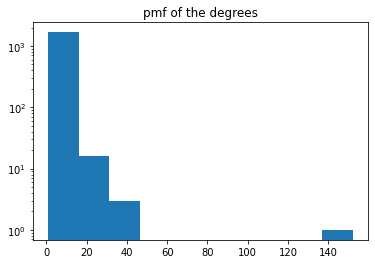

In [ ]:
plt.hist(freq_dict.values(),log = True)
plt.title('pmf of the degrees')
plt.show()

In [ ]:
print('most frequent words in the CNN pulled csv \n')
print([key for key in freq_dict.keys() if freq_dict[key]>15])   

most frequent words in the CNN pulled csv 

['covid19', 'vaccine', 'new', 'europe', 'us', 'virus', 'shots', 'health', 'vaccinated', 'cases', 'coronavirus', 'travel', 'people', 'breaking', 'pandemic', 'kids', 'variant', 'covid', 'could', 'infections', 'vaccines', 'deaths']


In [ ]:
A = adj_matrix(freq_dict,cleaned_df_text)   #version to improve for efficiency

spy plot of the adjacency matrix



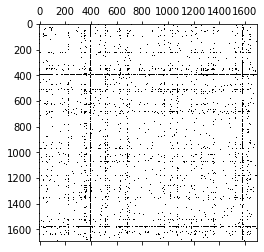

frequency table of bigrams of CNN csv (ordered by alphanumeric order) 

            10  100  100000   11  ...  “remove”  “the  “today  “very
10         0.0  9.0     3.0  2.0  ...       0.0   0.0     0.0    0.0
100        9.0  0.0     3.0  1.0  ...       0.0   0.0     0.0    0.0
100000     3.0  3.0     0.0  0.0  ...       0.0   0.0     0.0    0.0
11         2.0  1.0     0.0  0.0  ...       0.0   0.0     0.0    0.0
1178       0.0  0.0     0.0  1.0  ...       0.0   0.0     0.0    0.0
...        ...  ...     ...  ...  ...       ...   ...     ...    ...
“omicron”  0.0  0.0     0.0  0.0  ...       0.0   0.0     0.0    0.0
“remove”   0.0  0.0     0.0  0.0  ...       0.0   0.0     0.0    0.0
“the       0.0  0.0     0.0  0.0  ...       0.0   0.0     0.0    0.0
“today     0.0  0.0     0.0  0.0  ...       0.0   0.0     0.0    0.0
“very      0.0  0.0     0.0  0.0  ...       0.0   0.0     0.0    0.0

[1694 rows x 1694 columns]


In [ ]:
print('spy plot of the adjacency matrix\n')
plt.spy(A)
plt.show()
print('=====================================\nfrequency table of bigrams of CNN csv (ordered by alphanumeric order) \n')
print(A)

In [ ]:
# Constructing the graph object from the adjacency matrix

G = nx.convert_matrix.from_numpy_array(A.to_numpy())
G = nx.relabel_nodes(G , mapping = dict([ (i,sorted(list(freq_dict.keys()))[i]) for i in range(len(freq_dict.keys())) ]) ) 
print('is connected: ',nx.is_connected(G))

is connected:  True


### Pagerank

In [ ]:
# Calculating the pagerank on graph G, teleportation probability here is 0.15 but since the graph is strongly connected we can set it to zero if we want
pr = nx.algorithms.pagerank(G,alpha = 1)
pr = dict(sorted(pr.items(), key=lambda item: item[1],reverse  = True))

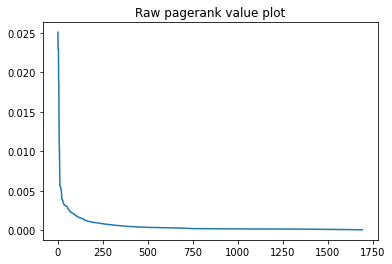

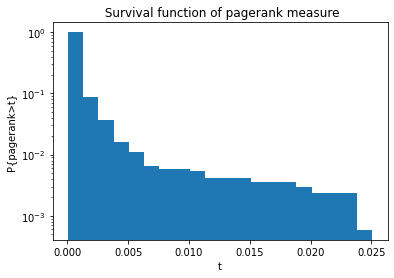

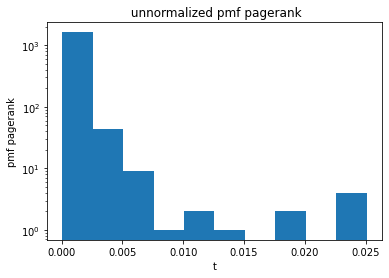

In [ ]:
plt.plot(list(pr.values()))
plt.title('Raw pagerank value plot')
plt.show()

print('\n=================================================')

plt.hist(list(pr.values()),log = True,cumulative=-1 ,bins = 20,density  = True)
plt.xlabel('t')
plt.ylabel('P{pagerank>t}')
plt.title(' Survival function of pagerank measure')
plt.show()

print('\n=================================================')

plt.hist(list(pr.values()),log = True ,cumulative = 0 )
plt.xlabel('t')
plt.ylabel('pmf pagerank')
plt.title(' unnormalized pmf pagerank')
plt.show()

With this plot we can filtrate out meaningful words by choosing a threshold on the pagerank. As a tentative, we filter out by thresholding at the last step, so we take only words with a pagerank value > 0.020

In [ ]:
threshold(pr,0.020)

         0         1
0    covid  0.025081
1        9  0.023115
2       19  0.022935
3  covid19  0.022935


filtering out by using thresholds we can selected new meaningful keywords to use in order to get new data.

In [ ]:
threshold(pr,0.003)

              0         1
0         covid  0.025081
1             9  0.023115
2            19  0.022935
3       covid19  0.022935
4            al  0.019171
5            de  0.018537
6            us  0.014131
7            un  0.010923
8            la  0.010724
9       vaccine  0.008824
10        virus  0.006602
11           go  0.005707
12           nn  0.005683
13          new  0.005583
14          eat  0.005549
15       europe  0.005424
16          hot  0.005300
17          day  0.005271
18          age  0.005068
19       nation  0.005048
20         shot  0.004824
21         case  0.003994
22        shots  0.003979
23        death  0.003889
24          end  0.003837
25       health  0.003836
26          say  0.003813
27        break  0.003807
28   vaccinated  0.003651
29        cases  0.003468
30          per  0.003444
31          one  0.003414
32          inc  0.003371
33         test  0.003342
34          ten  0.003295
35          try  0.003273
36          get  0.003257
37     pande

There's a pick in pagerank value around 0.02, we extract this words and use this ones as new keywords for a new twitter pull.

Since the graph is undirected hubs and authorities are the same thing.

### Betweenness centrality

In [ ]:
bet_centr = nx.betweenness_centrality(G)
bet_centr = dict(sorted(bet_centr.items(), key=lambda item: item[1],reverse  = True))

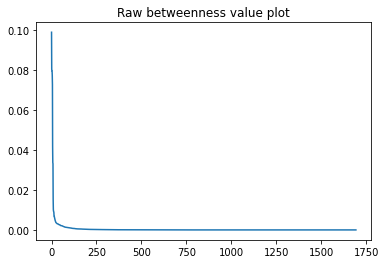

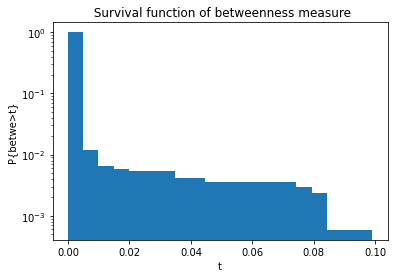

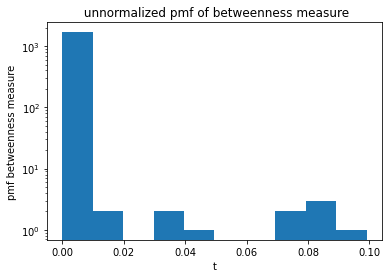

In [ ]:
plt.plot(list(bet_centr.values()))
plt.title('Raw betweenness value plot')
plt.show()

print('\n=================================================')

plt.hist(list(bet_centr.values()),log = True,cumulative=-1 ,bins = 20,density  = True)
plt.xlabel('t')
plt.ylabel('P{betwe>t}')
plt.title(' Survival function of betweenness measure')
plt.show()

print('\n=================================================')

plt.hist(list(bet_centr.values()),log = True ,cumulative = 0 )
plt.xlabel('t')
plt.ylabel('pmf betweenness measure')
plt.title(' unnormalized pmf of betweenness measure')
plt.show()

In [ ]:
threshold(bet_centr,0.0018)

              0         1
0         covid  0.099079
1             9  0.080636
2            19  0.079700
3       covid19  0.079700
4            de  0.077438
..          ...       ...
61  coronavirus  0.001946
62     breaking  0.001898
63   government  0.001887
64     restrict  0.001849
65       travel  0.001802

[66 rows x 2 columns]


### closeness centrality

In [ ]:
close_centr = nx.closeness_centrality(G)
close_centr = dict(sorted(close_centr.items(), key=lambda item: item[1],reverse  = True))

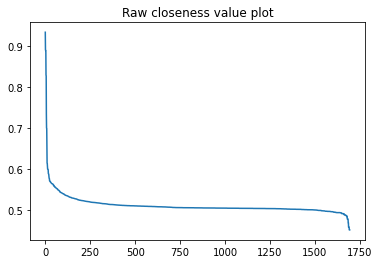

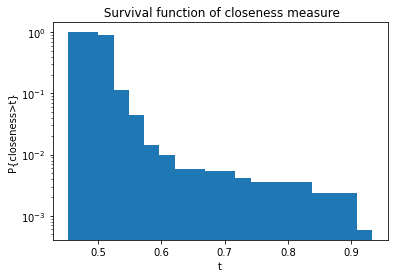

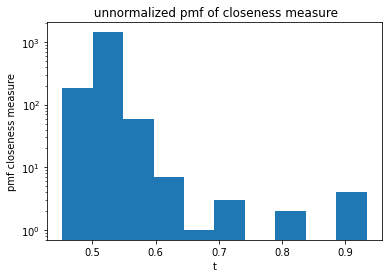

In [ ]:
plt.plot(list(close_centr.values()))
plt.title('Raw closeness value plot')
plt.show()

print('\n=================================================')

plt.hist(list(close_centr.values()),log = True,cumulative=-1 ,bins = 20,density  = True)
plt.xlabel('t')
plt.ylabel('P{closeness>t}')
plt.title(' Survival function of closeness measure')
plt.show()

print('\n=================================================')

plt.hist(list(close_centr.values()),log = True ,cumulative = 0 )
plt.xlabel('t')
plt.ylabel('pmf closeness measure')
plt.title(' unnormalized pmf of closeness measure')
plt.show()

In [ ]:
threshold(close_centr,0.54)

           0         1
0      covid  0.933811
1          9  0.891522
2         19  0.889181
3    covid19  0.889181
4         de  0.829495
..       ...       ...
97       sen  0.540895
98     biden  0.540549
99      east  0.540377
100      son  0.540377
101    surge  0.540377

[102 rows x 2 columns]


### Katz centrality (it just required too many iterations to reach convergence)

### TF-IDF

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(1,1))   # ngram range can be changed to obtain measures regarding n grams instead of single words

X = tfidf.fit_transform(cleaned_df_text).toarray()    # entry (i,j) if Tfidf measure of word_list[j] in document i

word_list = tfidf.get_feature_names_out()

In [ ]:
tfidf_df = pd.DataFrame(X,columns = word_list)

tfidf_df

,10,100,100000,11,1178,1195,11nnmore,11yearolds,12,1241,14000,1500,15b,18,19,1st,20,200,2021,21,26,27,28,30,300000,3100,34500,35,38,41335,50,50n,511,5day,5th,60th,61,77,8500,90,...,whether,white,widely,widespread,win,wine,winter,wisconsin,within,without,women,wont,wooden,work,workers,workersn,workforcen,working,workplace,works,world,worrisome,worse,worsens,would,wrapped,year,years,yes,yet,york,young,younger,youngkin,youngsters,youre,zeigleramon,zeman,zerotolerance,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.156788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.22812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.210591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.205818,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.302288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.222122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
tfidf_word_measure = np.mean(tfidf_df,axis = 0)

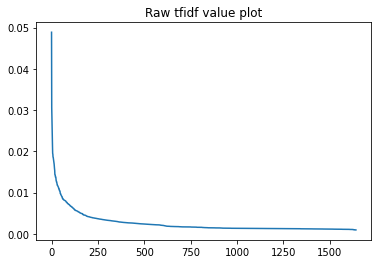

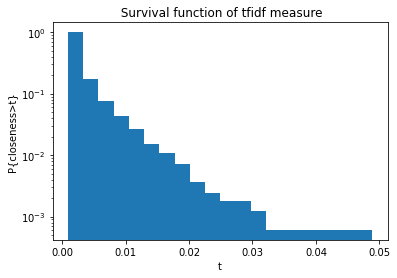

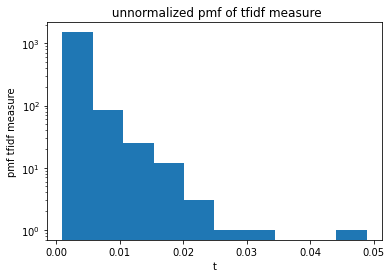

In [ ]:
plt.plot(sorted(list(tfidf_word_measure),reverse = True))
plt.title('Raw tfidf value plot')
plt.show()

print('\n=================================================')

plt.hist(list(tfidf_word_measure),log = True,cumulative=-1 ,bins = 20,density  = True)
plt.xlabel('t')
plt.ylabel('P{closeness>t}')
plt.title(' Survival function of tfidf measure')
plt.show()

print('\n=================================================')

plt.hist(list(tfidf_word_measure),log = True ,cumulative = 0 )
plt.xlabel('t')
plt.ylabel('pmf tfidf measure')
plt.title(' unnormalized pmf of tfidf measure')
plt.show()

In [ ]:
threshold(dict([(word,tfidf_df[word].loc[1] ) for word in word_list]) ,0.001)     #pretty stable measure, this are a way more significant than all the others

              0         1
0        appear  0.254294
1       approve  0.254294
2        attend  0.235694
3   certificate  0.254294
4       covid19  0.056849
5        events  0.235694
6   gatheringsn  0.254294
7     introduce  0.254294
8   legislation  0.254294
9          lets  0.254294
10     negative  0.235694
11       people  0.146427
12       public  0.212260
13    recovered  0.212260
14          set  0.190699
15      special  0.212260
16        swiss  0.254294
17       tested  0.185296
18   vaccinated  0.144293
19       voters  0.254294
